# Business Understanding

This project aims to determine which planes would be best to look into first for indoor skydiving companies that plan to expand to offer real skydiving. We'll use an Aviation Accident Dataset to determine which planes would be the lowest risk for the company to start looking into for their expansion. 


# Data Understanding

"Notebook clearly describes the data, including:
- Describe the data sources and explain why the data are suitable for the project
- Present the size of the dataset and descriptive statistics for all features used in the analysis
- Justify the inclusion of features based on their properties and relevance for the project
- Identify any limitations of the data that have implications for the project"


The data source used in this project is a data set from the National Transportation Safety Board with specifics about US aviation accidents between 1962 through 2023. It is in the form of a CSV file and accessed via Kaggle.

Through data cleaning and visualizations, this project provides recommendations about which planes would be of lowest risk. The Aviation Accident data set is a good option to use for this project as it contains many factual details of specific accidents in past flight accidents. 

The Aviation Accident dataset contains 90348 records of individual aviation accidents. There are 31 columns that break down each accident into further details.



## Data Preparation

### Import Standard Libraries & Load Dataset

"Notebook shows how and why you prepared your data, including:
- Instructions or code needed to get and prepare the raw data for analysis
- Code comments and text to explain what your data preparation code does
- Valid justifications for why the steps you took are appropriate for the problem you are solving"

In [235]:
#import standard libraries/ load dataset into dataframe
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
aviation = pd.read_csv('https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v3/refs/heads/master/data/Aviation_Data.csv')
aviation.head()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [236]:
aviation.shape

(90348, 31)

In [237]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [238]:
#note: specific accidents involving skydiving
aviation["Purpose.of.flight"].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

### Clean Dataset

In [239]:
#cleaning up columns
aviation1= aviation.drop(['Event.Id', 'Aircraft.damage', 'Broad.phase.of.flight', 'FAR.Description','Publication.Date', 'Aircraft.Category', 'Amateur.Built', 'Registration.Number', 'Accident.Number', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Air.carrier', 'Schedule', 'Investigation.Type', ], axis = 1)
aviation1.head()

,Event.Date,Location,Country,Injury.Severity,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause


In [240]:
#formate date column
aviation1['Event.Date'] = pd.to_datetime(aviation['Event.Date'])

In [241]:
#split date column by year and month
aviation1['Year'] = aviation1['Event.Date'].dt.year
aviation1['Month'] = aviation1['Event.Date'].dt.month_name()

In [242]:
#Injury.Severity column has number fatalities in parentheses, we already have that information in the Total.Fatalities column
#Split at the parentheses, and call the new column Injury.Severity.Type. Lastly, remove Injury.Severity column
aviation1['Injury.Severity.Type'] = aviation1['Injury.Severity'].str.split('(').str[0]
aviation1= aviation1.drop(['Injury.Severity'], axis =1) 

In [243]:
aviation1['Injury.Severity.Type'].value_counts()

Non-Fatal      67357
Fatal          17826
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: Injury.Severity.Type, dtype: int64

In [244]:
aviation1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              88889 non-null  datetime64[ns]
 1   Location                88837 non-null  object        
 2   Country                 88663 non-null  object        
 3   Make                    88826 non-null  object        
 4   Model                   88797 non-null  object        
 5   Number.of.Engines       82805 non-null  float64       
 6   Engine.Type             81812 non-null  object        
 7   Purpose.of.flight       82697 non-null  object        
 8   Total.Fatal.Injuries    77488 non-null  float64       
 9   Total.Serious.Injuries  76379 non-null  float64       
 10  Total.Minor.Injuries    76956 non-null  float64       
 11  Total.Uninjured         82977 non-null  float64       
 12  Weather.Condition       84397 non-null  object

In [245]:
aviation1['Make'].value_counts()

Cessna               22227
Piper                12029
CESSNA                4922
Beech                 4330
PIPER                 2841
                     ...  
Harwell/gardner          1
LAMMERS SJEF J           1
MUFFETT                  1
Williams Yakovlev        1
Bently                   1
Name: Make, Length: 8237, dtype: int64

In [248]:
#clean up Make column
aviation1['Make'] = aviation1['Make'].str.title()
aviation1['Make'] = aviation1['Make'].replace('Dehavilland', 'De Havilland')
aviation1['Make'].value_counts()

Cessna                         27149
Piper                          14870
Beech                           5372
Boeing                          2745
Bell                            2722
                               ...  
Sungkwon Kim                       1
Pacific Aviation Composites        1
Millhouse D Scott                  1
Zeidman                            1
Pekola James W                     1
Name: Make, Length: 7586, dtype: int64

In [250]:
aviation1['Model'].value_counts().head(10)

152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
Name: Model, dtype: int64

In [252]:
aviation1['Model'] = aviation1['Model'].str.replace(r'[a-zA-Z]$', '', regex=True)
aviation1['Model'].value_counts().head(10)

172          6487
150          3152
182          2654
152          2424
M20          1221
180          1062
206          1030
G-164        1014
PA-28-140     953
T210          776
Name: Model, dtype: int64

In [253]:
aviation1['Country'].value_counts()

United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
                  ...  
Wolseley              1
Malampa               1
Belarus               1
Anguilla              1
Mauritania            1
Name: Country, Length: 219, dtype: int64

In [212]:
aviation1.to_csv('avation1.csv', index=False) 

In [254]:
#to only look at accidents within the states, create US dataframe
aviation_us= aviation1[aviation1['Country'] == 'United States']
aviation_us= aviation_us.drop(['Country'], axis =1) 
aviation_us.reset_index(drop= True, inplace=True)

In [255]:
#split location into city and state columns, remove location column
aviation_us['City'] = aviation_us['Location'].str.split(',').str[0]
aviation_us['State'] = aviation_us['Location'].str.split(',').str[1]
aviation_us= aviation_us.drop(['Location'], axis =1)

In [256]:
aviation_us.shape

(82248, 17)

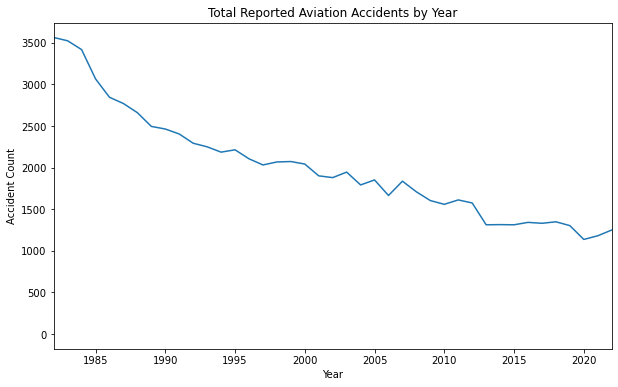

In [257]:
accidents_by_year = aviation_us.groupby(aviation_us['Event.Date'].dt.year).size()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(accidents_by_year)
ax.set_xlim(1982, aviation_us['Year'].max())
ax.set_xlabel("Year")
ax.set_ylabel("Accident Count")
ax.set_title("Total Reported Aviation Accidents by Year")
plt.show()

In [261]:
aviation_us.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82248 entries, 0 to 82247
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              82248 non-null  datetime64[ns]
 1   Make                    82227 non-null  object        
 2   Model                   82210 non-null  object        
 3   Number.of.Engines       80373 non-null  float64       
 4   Engine.Type             79225 non-null  object        
 5   Purpose.of.flight       79819 non-null  object        
 6   Total.Fatal.Injuries    71594 non-null  float64       
 7   Total.Serious.Injuries  70873 non-null  float64       
 8   Total.Minor.Injuries    71519 non-null  float64       
 9   Total.Uninjured         77243 non-null  float64       
 10  Weather.Condition       81603 non-null  object        
 11  Report.Status           79637 non-null  object        
 12  Year                    82248 non-null  float6

In [262]:
aviation_us.isna().sum()/82248

Event.Date                0.000000
Make                      0.000255
Model                     0.000462
Number.of.Engines         0.022797
Engine.Type               0.036755
Purpose.of.flight         0.029533
Total.Fatal.Injuries      0.129535
Total.Serious.Injuries    0.138301
Total.Minor.Injuries      0.130447
Total.Uninjured           0.060853
Weather.Condition         0.007842
Report.Status             0.031745
Year                      0.000000
Month                     0.000000
Injury.Severity.Type      0.001313
City                      0.000134
State                     0.000134
dtype: float64

In [263]:
#finish cleaning aviation_us dataframe
aviation_us.dropna(subset=['City'], inplace=True)
aviation_us.dropna(subset=['State'], inplace=True)
aviation_us.dropna(subset=['Injury.Severity.Type'], inplace=True)
aviation_us.dropna(subset=['Make'], inplace=True)
aviation_us.dropna(subset=['Model'], inplace=True)
aviation_us.dropna(subset=['Number.of.Engines'],inplace=True)
aviation_us.dropna(subset=['Engine.Type'], inplace=True)
aviation_us.dropna(subset=['Purpose.of.flight'], inplace=True)
aviation_us.dropna(subset=['Total.Fatal.Injuries'], inplace=True)
aviation_us.dropna(subset=['Total.Serious.Injuries'], inplace=True)
aviation_us.dropna(subset=['Total.Minor.Injuries'], inplace=True)
aviation_us.dropna(subset=['Total.Uninjured'], inplace=True)
aviation_us.dropna(subset=['Weather.Condition'], inplace=True)
aviation_us.dropna(subset=['Report.Status'], inplace=True)

In [265]:
aviation_us.reset_index(drop= True, inplace= True)
aviation_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63549 entries, 0 to 63548
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              63549 non-null  datetime64[ns]
 1   Make                    63549 non-null  object        
 2   Model                   63549 non-null  object        
 3   Number.of.Engines       63549 non-null  float64       
 4   Engine.Type             63549 non-null  object        
 5   Purpose.of.flight       63549 non-null  object        
 6   Total.Fatal.Injuries    63549 non-null  float64       
 7   Total.Serious.Injuries  63549 non-null  float64       
 8   Total.Minor.Injuries    63549 non-null  float64       
 9   Total.Uninjured         63549 non-null  float64       
 10  Weather.Condition       63549 non-null  object        
 11  Report.Status           63549 non-null  object        
 12  Year                    63549 non-null  float6

In [266]:
aviation_us.to_csv('aviation_us.csv', index= False)

In [184]:
# Want to see some specifics first about accidents related to skydiving to get a perspective that we'll use with the full data set
#skydiving specific dataframe
skydiving = aviation_us[aviation_us['Purpose.of.flight'] == 'Skydiving']
skydiving.head()

#reset the index
skydiving.reset_index(drop= True, inplace=True)

In [185]:
skydiving.head()


,Event.Date,Location,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Year,Month,Injury.Severity.Type
0,1982-07-25,"LOUISBURG, NC",Cessna,182,1.0,Reciprocating,Skydiving,4.0,1.0,NaN,NaN,VMC,Probable Cause,1982.0,July,Fatal
1,1982-10-17,"TAFT, CA",Beech,C-45,2.0,Reciprocating,Skydiving,14.0,NaN,NaN,NaN,VMC,Probable Cause,1982.0,October,Fatal
2,1983-04-02,"MCKINNEY, TX",De Havilland,DHC-6,2.0,Turbo Prop,Skydiving,1.0,NaN,NaN,4.0,VMC,Probable Cause,1983.0,April,Fatal
3,1983-08-21,"SILVANA, WA",Lockheed,"LEARSTAR, L-18-56",2.0,Reciprocating,Skydiving,11.0,2.0,NaN,13.0,VMC,Probable Cause,1983.0,August,Fatal
4,1984-12-30,"DUBLIN, VA",Cessna,182,1.0,Reciprocating,Skydiving,1.0,NaN,NaN,NaN,VMC,Probable Cause,1984.0,December,Fatal


In [186]:
skydiving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              171 non-null    datetime64[ns]
 1   Location                171 non-null    object        
 2   Make                    171 non-null    object        
 3   Model                   171 non-null    object        
 4   Number.of.Engines       171 non-null    float64       
 5   Engine.Type             165 non-null    object        
 6   Purpose.of.flight       171 non-null    object        
 7   Total.Fatal.Injuries    141 non-null    float64       
 8   Total.Serious.Injuries  121 non-null    float64       
 9   Total.Minor.Injuries    117 non-null    float64       
 10  Total.Uninjured         135 non-null    float64       
 11  Weather.Condition       171 non-null    object        
 12  Report.Status           165 non-null    object    

In [187]:
skydiving['Make'].value_counts()

Cessna                        126
Beech                          18
De Havilland                   16
Pacific Aerospace Corp Ltd      3
Pilatus                         2
Lockheed                        2
Helio                           1
Boeing                          1
Firefly Balloons Inc            1
C A S A                         1
Name: Make, dtype: int64

In [188]:
skydiving['Model'].value_counts()

182                  84
208                  15
P206                  7
DHC-6                 5
B90                   4
U206                  4
C-45                  3
TU206                 3
750X                  3
65-A90                2
DHC-6-200             2
99                    2
DHC 6 TWIN OTTE       2
TP206                 2
205                   2
E 90                  1
65 A90                1
A75N1 (PT17)          1
PC-6                  1
L-402-2 (LASA-60)     1
402                   1
DHC-3                 1
K172                  1
DHC 6                 1
210-5                 1
210                   1
DHC-6-6               1
T207                  1
206                   1
LEARSTAR, L-18-56     1
DHC-6 Twin Otte       1
BE99                  1
PC-6/B2-H2            1
FIREFLY 8             1
DHC 6 200             1
210 5(205)            1
65                    1
G18 -                 1
D50                   1
DHC-6 TWI             1
DHC-6-100             1
A185            

In [189]:
skydiving['Injury.Severity.Type'].value_counts()

Non-Fatal    114
Fatal         55
Serious        1
Minor          1
Name: Injury.Severity.Type, dtype: int64

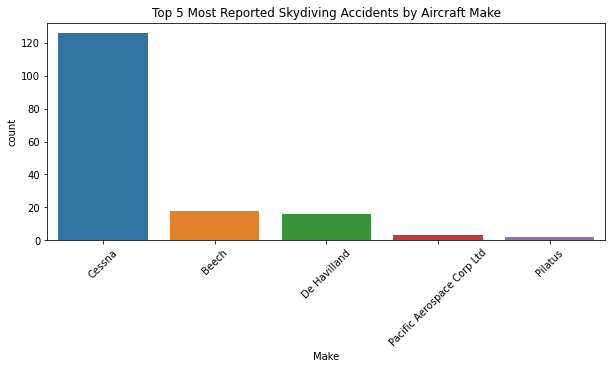

In [133]:
make_ordered = skydiving['Make'].value_counts(ascending=False).index[:5]

# Create a figure with a wider aspect ratio
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the width (10) as needed
sns.countplot(x='Make', data=skydiving, order= make_ordered)
plt.xticks(rotation=45)
ax.set_title("Top 5 Most Reported Skydiving Accidents by Aircraft Make")
plt.show()


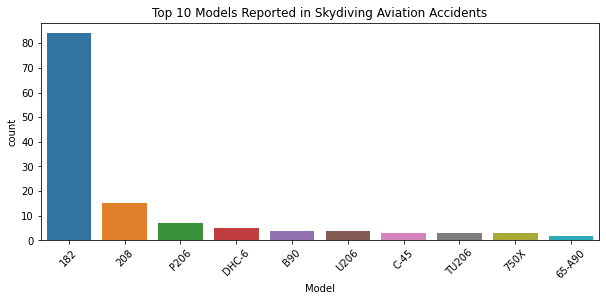

In [142]:
model_ordered = skydiving['Model'].value_counts(ascending=False).index[:10]

# Create a figure with a wider aspect ratio
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the width (10) as needed
sns.countplot(x='Model', data=skydiving, order= model_ordered)
plt.xticks(rotation=45)
ax.set_title("Top 10 Models Reported in Skydiving Aviation Accidents")
plt.show()


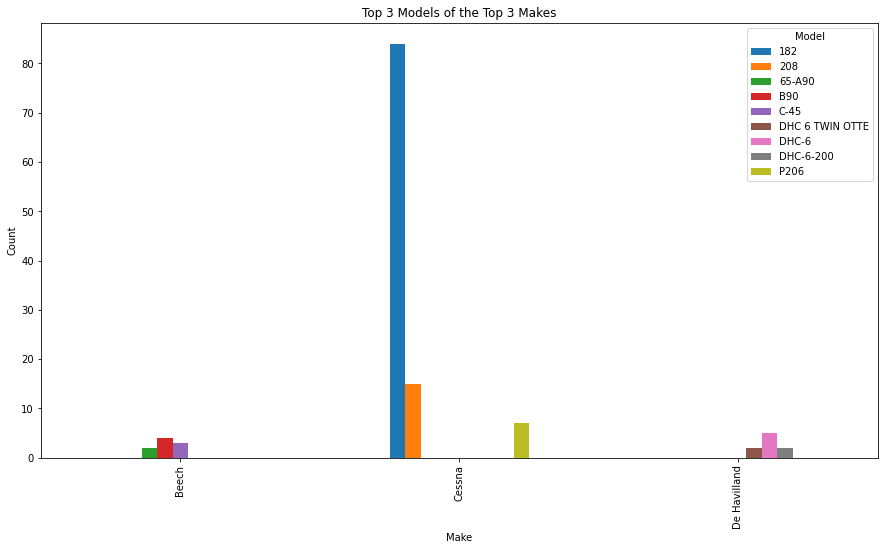

In [143]:

sky_top_makes = skydiving['Make'].value_counts().nlargest(3).index

# Filter dataframe for top 2 makes
skydiving_top_makes = skydiving[skydiving['Make'].isin(sky_top_makes)]

# Get top 3 models for each make
sky_top_models = skydiving_top_makes.groupby('Make')['Model'].value_counts().groupby(level=0).nlargest(3).reset_index(level=0, drop=True)

# Create unstacked bar chart
sky_top_models.unstack().plot(kind='bar', stacked=False, figsize=(15,8))
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Top 3 Models of the Top 3 Makes')
plt.show()

# Exploratory Data Analysis

In [147]:
aviation_us.isna().sum()

Event.Date                0
Location                  0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
Year                      0
Month                     0
Injury.Severity.Type      0
dtype: int64

In [150]:
aviation_us.reset_index(drop= True, inplace=True)
aviation_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63549 entries, 0 to 63548
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              63549 non-null  datetime64[ns]
 1   Location                63549 non-null  object        
 2   Make                    63549 non-null  object        
 3   Model                   63549 non-null  object        
 4   Number.of.Engines       63549 non-null  float64       
 5   Engine.Type             63549 non-null  object        
 6   Purpose.of.flight       63549 non-null  object        
 7   Total.Fatal.Injuries    63549 non-null  float64       
 8   Total.Serious.Injuries  63549 non-null  float64       
 9   Total.Minor.Injuries    63549 non-null  float64       
 10  Total.Uninjured         63549 non-null  float64       
 11  Weather.Condition       63549 non-null  object        
 12  Report.Status           63549 non-null  object

"Notebook promotes three recommendations for choosing films to produce:
 - Uses three or more findings from data analyses to support recommendations
 - Explains why the findings support the recommendations
 - Explains how the recommendations would help the stakeholder


"Notebook includes three relevant and polished visualizations of findings that:
 - Help the project stakeholder understand the value or success of the project
 - Have text and marks to aid reader interpretation, such as graph and axis titles, axis ticks and labels, or legend (varies by visualization type)
 - Use color, size, and/or location to appropriately facilitate comparisons
 - Are not cluttered, dense, or illegible
"

# Conclusions

## Limitations

The largest limitation of this data set is that we only have the data for accidents. We don't have the data for when flights occurred where everything went smoothly. This means we cannot say anything like: "99% of flights of a certain kind of plane has safe flights." This also makes it difficult to see the whole picture. We assume that certain Aircrafts appear more often because they are more common, not because they are inherently more dangerous.

## Recommendations

These planes are commonly used.
Of the commonly used, these have the least reported accidents.
Of all of the reported accidents with most commonly used planes, these are the main reason for the accident.

## Next Steps

Look into price for these planes.